# Bank Customers Churn Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Get Overall Statistics About The Dataset

In [9]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#### Dropping Irrelevant Features

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Encoding Categorical Data

In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data = pd.get_dummies(data,drop_first=True)

In [16]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


#### Not Handling Imbalanced

In [17]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

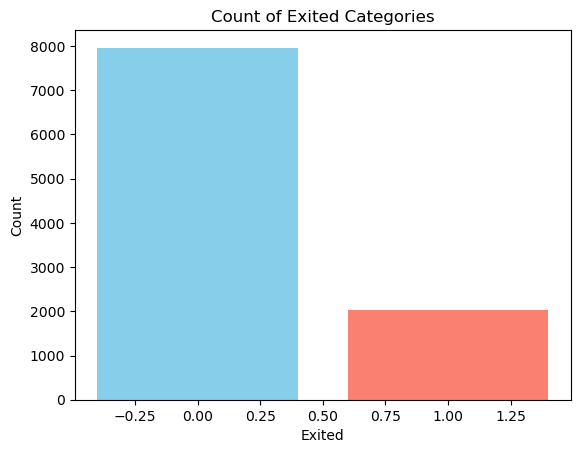

In [21]:
import matplotlib.pyplot as plt
counts = data['Exited'].value_counts()
colors = ['skyblue', 'salmon']
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited Categories')
plt.show()

In [22]:
X = data.drop('Exited',axis=1)
y = data['Exited']

#### Handling Imbalanced Data With SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

#### Splitting The Dataset Into The Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

#### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc= StandardScaler()

In [29]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.74845652,  0.30898056,  0.0690667 , ...,  1.30637176,
        -0.62929436, -1.23299511],
       [ 1.09606045,  0.1081432 , -1.40296961, ..., -0.76547889,
        -0.62929436,  0.81103322],
       [ 0.02800427, -0.09269417,  1.17309392, ..., -0.76547889,
        -0.62929436,  0.81103322],
       ...,
       [ 0.20238079,  0.20856188,  1.17309392, ..., -0.76547889,
        -0.62929436,  0.81103322],
       [ 0.99797365,  0.6102366 , -0.29894238, ..., -0.76547889,
         1.58908145,  0.81103322],
       [ 0.52933676,  1.01191133, -1.40296961, ...,  1.30637176,
        -0.62929436,  0.81103322]])

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred1)

0.7736974262397991

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [36]:
precision_score(y_test,y_pred1)

0.7663252240717029

In [37]:
recall_score(y_test,y_pred1)

0.7707662588538313

In [38]:
f1_score(y_test,y_pred1)

0.7685393258426966

#### SVC

In [39]:
from sklearn import svm

In [40]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred2 = svm.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred2)

0.8421217827997489

In [43]:
precision_score(y_test,y_pred2)

0.8449408672798949

####  KNeighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred3 = knn.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred3)

0.8248587570621468

In [48]:
precision_score(y_test,y_pred3)

0.8069093152375078

#### Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4 = dt.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.8016321406151915

In [54]:
precision_score(y_test,y_pred4)

0.7775768535262206

#### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred5 = rf.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred5)

0.867231638418079

In [59]:
precision_score(y_test,y_pred5)

0.864516129032258

#### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
y_pred6 = gbc.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred6)

0.837413684871312

In [64]:
precision_score(y_test,y_pred6)

0.8349514563106796

#### comparison of models accuracy score

In [74]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [75]:
final_data

,Models,ACC
0,LR,0.773697
1,SVC,0.842122
2,KNN,0.824859
3,DT,0.801632
4,RF,0.867232
5,GBC,0.837414


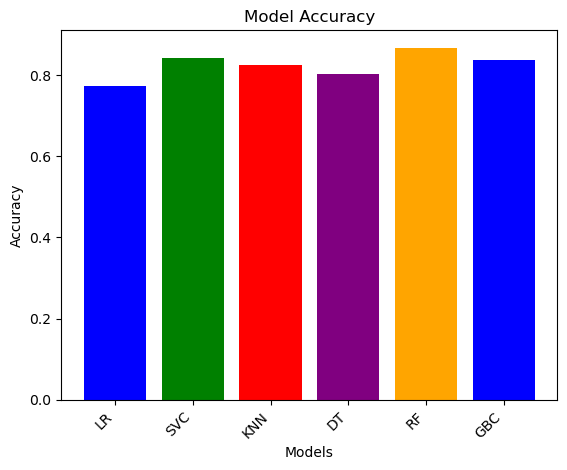

In [76]:
import matplotlib.pyplot as plt
models = final_data['Models']
acc = final_data['ACC']
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(models, acc, color=colors[:len(models)]) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#### comparison of models  score

In [77]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [78]:
final_data

,Models,PRE
0,LR,0.766325
1,SVC,0.844941
2,KNN,0.806909
3,DT,0.777577
4,RF,0.864516
5,GBC,0.834951


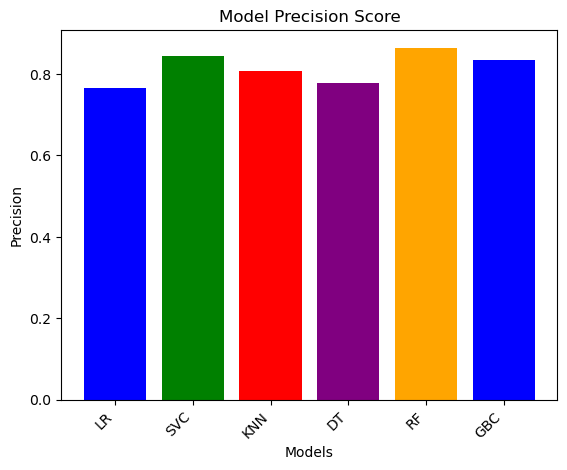

In [79]:
import matplotlib.pyplot as plt
models = final_data['Models']
pre = final_data['PRE']
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(models, pre, color=colors[:len(models)]) 
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [80]:
X_res=sc.fit_transform(X_res)

In [81]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [82]:
import joblib

In [83]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [84]:
model = joblib.load('churn_predict_model')

In [85]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [89]:
model.predict([[520,35,1,0.0,0,0,0,203421.65,0,0,0]])

array([1], dtype=int64)

In [90]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [93]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('churn_predict_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\vedvelani\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
